In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# r2_score is used when multiple independent columns are used to create a model
from sklearn.metrics import r2_score

In [2]:
# TASK1.1
df = pd.read_csv(r'DS1_C9_S2_Practice_BikeSales_Data.csv')
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18-02-2014,18,February,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,04-03-2014,4,March,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [3]:
# TASK2
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      5
Unit_Cost           0
Unit_Price          3
Profit              2
Cost                2
Revenue             0
dtype: int64

In [4]:
mode_order = df["Order_Quantity"].mode()[0]
df["Order_Quantity"] = df["Order_Quantity"].fillna(mode_order)

mode_price = df["Unit_Price"].mode()[0]
df["Unit_Price"] = df["Unit_Price"].fillna(mode_price)

mode_profit = df["Profit"].mode()[0]
df["Profit"] = df["Profit"].fillna(mode_profit)

mode_cost = df["Cost"].mode()[0]
df["Cost"] = df["Cost"].fillna(mode_cost)


In [5]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [6]:
selected_cols = ["Order_Quantity","Unit_Cost","Unit_Price","Customer_Age"]
selected_cols

['Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Customer_Age']

In [7]:
df.describe

<bound method NDFrame.describe of            Date  Day      Month  Year  Customer_Age             Age_Group  \
0    26-11-2013   26   November  2013            19           Youth (<25)   
1    26-11-2015   26   November  2015            19           Youth (<25)   
2    02-08-2013    2     August  2013            29  Young Adults (25-34)   
3    02-08-2015    2     August  2015            29  Young Adults (25-34)   
4    02-09-2013    2  September  2013            29  Young Adults (25-34)   
..          ...  ...        ...   ...           ...                   ...   
495  18-02-2014   18   February  2014            37        Adults (35-64)   
496  18-02-2016   18   February  2016            37        Adults (35-64)   
497  18-02-2016   18   February  2016            37        Adults (35-64)   
498  04-03-2014    4      March  2014            37        Adults (35-64)   
499  04-03-2014    4      March  2014            37        Adults (35-64)   

    Customer_Gender Country             S

In [8]:
category = df.select_dtypes(exclude = 'number')
numerical = df.select_dtypes(include = 'number')

In [9]:
df.dtypes

Date                 object
Day                   int64
Month                object
Year                  int64
Customer_Age          int64
Age_Group            object
Customer_Gender      object
Country              object
State                object
Product_Category     object
Sub_Category         object
Product              object
Order_Quantity      float64
Unit_Cost             int64
Unit_Price          float64
Profit              float64
Cost                float64
Revenue               int64
dtype: object

In [10]:
# StandardScaler to preprocess int , float
# TASK2
from sklearn.preprocessing import StandardScaler
def scaling_numeric():
    data_types = ["int64","float64"]
    new_df = df.select_dtypes(include = data_types)
    
    scaler_obj = StandardScaler()
    df_scaled = pd.DataFrame(scaler_obj.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

In [11]:
df_scaled = scaling_numeric()
df_scaled

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,1.247044,-1.391889,-1.549292,-0.566218,1.308878,1.316960,1.125846,1.097898,1.091750
1,1.247044,0.401782,-1.549292,-0.566218,1.308878,1.316960,1.125846,1.097898,1.091750
2,-1.522113,-1.391889,-0.668412,-0.889647,1.308878,1.316960,0.474680,0.453306,0.451221
3,-1.522113,0.401782,-0.668412,-0.674027,1.308878,1.316960,0.910755,0.883034,0.879440
4,-1.522113,-1.391889,-0.668412,-1.213077,1.308878,1.316960,-0.176487,-0.191286,-0.189309
...,...,...,...,...,...,...,...,...,...
495,0.323991,-0.495053,0.036292,-0.027168,-0.669252,-0.659425,-0.500597,-0.496871,-0.502377
496,0.323991,1.298618,0.036292,1.913410,-0.669252,-0.659425,-0.344435,-0.324979,-0.342244
497,0.323991,1.298618,0.036292,-0.242788,-0.669252,-0.659425,-0.518275,-0.515970,-0.520369
498,-1.291350,-0.495053,0.036292,-0.889647,-0.669252,-0.659425,-0.568365,-0.573267,-0.572547


In [12]:
# LabelEncoding to preprocess object datatype
from sklearn import preprocessing
label_obj = preprocessing.LabelEncoder()
for col in category:
    category[col] = label_obj.fit_transform(category[col])

In [13]:
final_df = pd.concat([df_scaled,category],axis = 1) # axis = 1 joining by column, 0 by row
final_df = final_df.iloc[:, 2:]
final_df

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
0,-1.549292,-0.566218,1.308878,1.316960,1.125846,1.097898,1.091750,234,9,3,1,0,1,0,0,1
1,-1.549292,-0.566218,1.308878,1.316960,1.125846,1.097898,1.091750,235,9,3,1,0,1,0,0,1
2,-0.668412,-0.889647,1.308878,1.316960,0.474680,0.453306,0.451221,16,1,2,1,0,1,0,0,1
3,-0.668412,-0.674027,1.308878,1.316960,0.910755,0.883034,0.879440,17,1,2,1,0,1,0,0,1
4,-0.668412,-1.213077,1.308878,1.316960,-0.176487,-0.191286,-0.189309,18,11,2,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.036292,-0.027168,-0.669252,-0.659425,-0.500597,-0.496871,-0.502377,158,3,0,1,0,1,0,2,4
496,0.036292,1.913410,-0.669252,-0.659425,-0.344435,-0.324979,-0.342244,159,3,0,1,0,1,0,2,4
497,0.036292,-0.242788,-0.669252,-0.659425,-0.518275,-0.515970,-0.520369,159,3,0,1,0,1,0,2,4
498,0.036292,-0.889647,-0.669252,-0.659425,-0.568365,-0.573267,-0.572547,38,7,0,1,0,1,0,2,4


In [14]:
cols = ["Order_Quantity","Unit_Cost","Unit_Price","Customer_Age","Revenue"]

In [15]:
numerical.columns

Index(['Day', 'Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost',
       'Unit_Price', 'Profit', 'Cost', 'Revenue'],
      dtype='object')

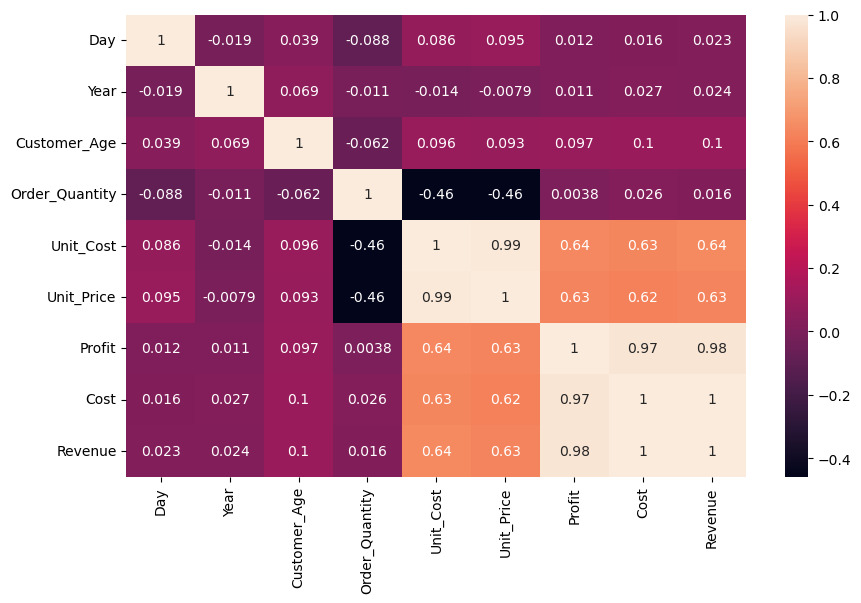

In [16]:
# TASK2
fig,ax =  plt.subplots(figsize=(10,6))
sns.heatmap(numerical.corr(),annot = True)
plt.show()

# From the above HeatMap Unit_CostAnd Revenue are highly correlated

In [18]:
# TASK3 
# SIMPLE LINEAR REGRESSION WOITH THE HIGHLY CORRELATED COLUMN

In [19]:
x = np.array(final_df['Unit_Cost']).reshape(-1,1)

In [20]:
y = np.array(final_df['Revenue']).reshape(-1,1)

In [21]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)

In [22]:
linear_model = LinearRegression()
simple_linear  = linear_model.fit(x_train,y_train)
r_sq = simple_linear.score(x_train,y_train)
r_sq

0.4282232386283019

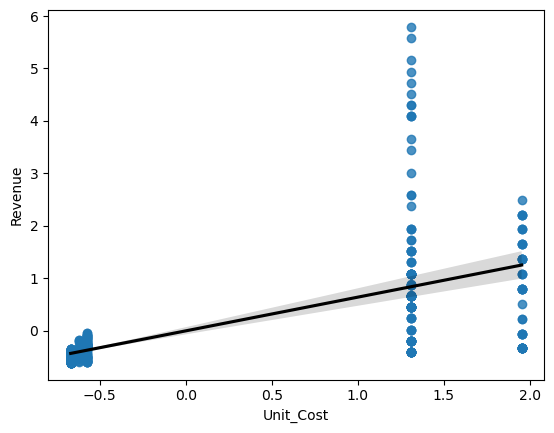

In [23]:
sns.regplot(x = "Unit_Cost", y = "Revenue", data  = final_df, line_kws = {"color":"black"})
plt.show()

In [76]:
y_pred = simple_linear.predict(x_test)


In [74]:
# TASK4
mse = mean_squared_error(y_test,y_pred)
mse

0.9356055584999816

In [78]:
rmse = root_mean_squared_error(y_test,y_pred) # RMSE
rmse


0.9672670564533776

In [80]:
mae = mean_absolute_error(y_test,y_pred) # for mean absolute error
mae

0.43733428054461426

In [28]:
r2 = r2_score(y_test, y_pred)
r2


0.36413667544433315

In [82]:
r_sq = simple_linear.score(x_test,y_test)
r_sq

0.36413667544433315

In [30]:
# TASK3
linear_model.intercept_

array([-0.05165305])

In [31]:
linear_model.coef_

array([[0.57784963]])

In [32]:
df_residual= pd.DataFrame()
df_residual["y_pred"] = pd.DataFrame(y_pred)
df_residual["y_pred"]

0     -0.438380
1      0.704682
2     -0.438380
3     -0.385214
4      1.076841
         ...   
145   -0.438380
146    0.704682
147   -0.438380
148   -0.438380
149   -0.438380
Name: y_pred, Length: 150, dtype: float64

In [33]:
df_residual["y_actual"] = pd.DataFrame(y_test)
df_residual["y_actual"]

0     -0.502377
1      0.451221
2     -0.572547
3     -0.261278
4     -0.335047
         ...   
145   -0.358437
146   -0.403418
147   -0.554554
148   -0.511373
149   -0.394422
Name: y_actual, Length: 150, dtype: float64

In [34]:
df_residual["residual"] = abs(df_residual["y_pred"] - df_residual["y_actual"])
df_residual

,y_pred,y_actual,residual
0,-0.438380,-0.502377,0.063996
1,0.704682,0.451221,0.253461
2,-0.438380,-0.572547,0.134167
3,-0.385214,-0.261278,0.123936
4,1.076841,-0.335047,1.411888
...,...,...,...
145,-0.438380,-0.358437,0.079943
146,0.704682,-0.403418,1.108100
147,-0.438380,-0.554554,0.116174
148,-0.438380,-0.511373,0.072993


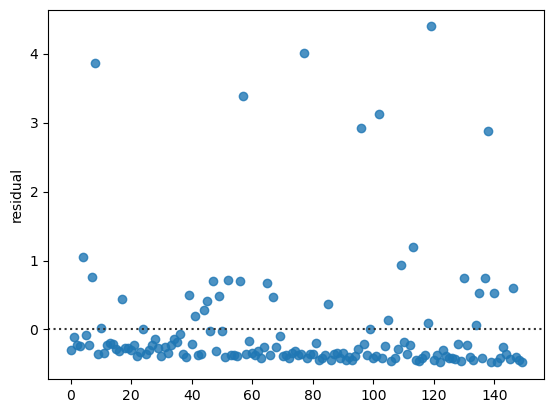

In [35]:
# residual plot
sns.residplot(x=df_residual.index, y ="residual" , data = df_residual);

In [36]:
# As above shown figure homoscedasticity is followed
# And the assumption is normality of residuals

In [37]:
# As we got r_square score value as 0.06665 its a very bad model